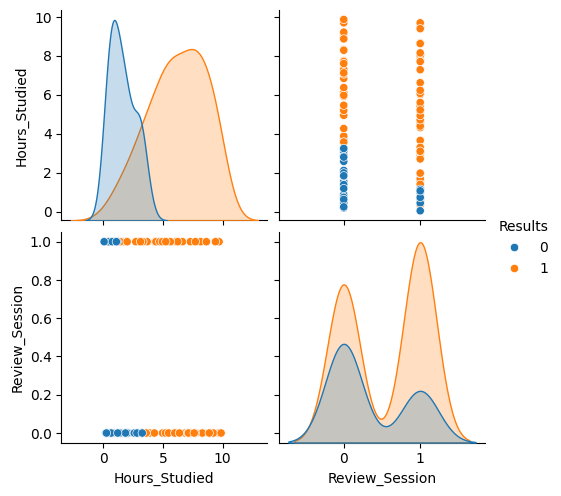

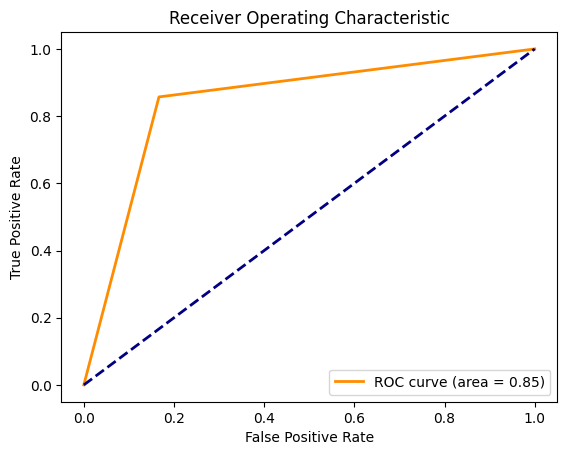

Accuracy: 0.85
ROC-AUC: 0.85
Model Coefficients: [[1.40365599 1.42846816]]
Model Intercept: [-4.58136123]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("student_data.csv")

# Plotting the data using seaborn
sns.pairplot(data, hue="Results", diag_kind="kde")
plt.show()


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Prepare the data
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Output accuracy and ROC-AUC score
print("Accuracy: {:.2f}".format(accuracy))
print("ROC-AUC: {:.2f}".format(roc_auc))

# Output model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# Load the dataset
data = pd.read_csv("student_data.csv")

# Prepare the data
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit SVM model with Linear Kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Predictions and accuracy for Linear Kernel
linear_predictions = svm_linear.predict(X_test)
linear_accuracy = accuracy_score(y_test, linear_predictions)
print("Accuracy with Linear Kernel:", linear_accuracy)

# Define parameter grid for RBF Kernel
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10]}

# Perform Grid Search with 5-fold Cross Validation for RBF Kernel
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=kf)
grid_search.fit(X_train, y_train)

# Best parameters and SVM model with RBF Kernel
best_params = grid_search.best_params_
print("Best Parameters for RBF Kernel:", best_params)

svm_rbf = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], random_state=42)
svm_rbf.fit(X_train, y_train)

# Predictions and accuracy for RBF Kernel
rbf_predictions = svm_rbf.predict(X_test)
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
print("Accuracy with RBF Kernel:", rbf_accuracy)


Accuracy with Linear Kernel: 0.85
Best Parameters for RBF Kernel: {'C': 10, 'gamma': 0.1}
Accuracy with RBF Kernel: 0.85
